In [98]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import tensorflow as tf
from matplotlib import pyplot as plt
import torch.nn as nn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
import torch.optim as optim

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA

from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score


In [99]:
device = torch.device("cuda:0")
EV_Title = pd.DataFrame(pd.read_csv('Electric_Vehicle_Title_and_Registration_Activity.csv'))
EV_Title.head()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,DOL Transaction Date,Transaction Type,Transaction Year,...,Legislative District,2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility,Meets 2019 HB 2042 Electric Range Requirement,Meets 2019 HB 2042 Sale Date Requirement,Meets 2019 HB 2042 Sale Price/Value Requirement,Odometer Reading,Odometer Code,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract
0,Battery Electric Vehicle (BEV),WMWXP3C0XM,2021,MINI,Hardtop,Used,0,August 04 2022,Registration Renewal,2022,...,45.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,Yes,No,5.303302e+10
1,Plug-in Hybrid Electric Vehicle (PHEV),KNDCM3LD1J,2018,KIA,Niro,Used,0,November 19 2021,Registration Renewal,2021,...,36.0,VEHICLE MODEL NOT ELIGIBLE: Low battery range;...,False,False,False,0,Odometer reading is not collected at time of r...,No,Yes,5.303300e+10
2,Plug-in Hybrid Electric Vehicle (PHEV),KNDCM3LD1J,2018,KIA,Niro,New,26999,December 31 2018,Original Title,2018,...,36.0,VEHICLE MODEL NOT ELIGIBLE: Low battery range;...,False,False,True,17,Actual Mileage,Not Applicable,Not Applicable,5.303300e+10
3,Plug-in Hybrid Electric Vehicle (PHEV),KNDCM3LD1J,2018,KIA,Niro,New,0,December 31 2018,Original Registration,2018,...,36.0,VEHICLE MODEL NOT ELIGIBLE: Low battery range;...,False,False,False,0,Odometer reading is not collected at time of r...,No,No,5.303300e+10
4,Plug-in Hybrid Electric Vehicle (PHEV),KNDCM3LD1J,2018,KIA,Niro,Used,0,December 23 2019,Registration Renewal,2019,...,36.0,VEHICLE MODEL NOT ELIGIBLE: Low battery range;...,False,False,False,0,Odometer reading is not collected at time of r...,No,Yes,5.303300e+10


In [100]:
features = ['VIN (1-10)','Transaction Type', 'Transaction Year', 'Postal Code']
EV_Title = EV_Title[features]
EV_Title.head()

,VIN (1-10),Transaction Type,Transaction Year,Postal Code
0,WMWXP3C0XM,Registration Renewal,2022,98072.0
1,KNDCM3LD1J,Registration Renewal,2021,98103.0
2,KNDCM3LD1J,Original Title,2018,98103.0
3,KNDCM3LD1J,Original Registration,2018,98103.0
4,KNDCM3LD1J,Registration Renewal,2019,98103.0


In [101]:
EV_Title = EV_Title[EV_Title['Transaction Type'] == 'Original Title']
EV_Title.head()

,VIN (1-10),Transaction Type,Transaction Year,Postal Code
2,KNDCM3LD1J,Original Title,2018,98103.0
6,JTDKARFP1J,Original Title,2018,98311.0
7,5YJ3E1EA3J,Original Title,2018,98034.0
13,5YJ3E1EC9N,Original Title,2022,98006.0
16,1G1FZ6S00K,Original Title,2018,98006.0


In [102]:
EV_Title.drop_duplicates(subset = "VIN (1-10)",keep = False, inplace= True) ##dropping duplicate vins
EV_Title.head()

,VIN (1-10),Transaction Type,Transaction Year,Postal Code
336,WP0CD2Y13N,Original Title,2022,98290.0
1522,5YJRE1A38A,Original Title,2020,98119.0
1693,KMHC75LD4N,Original Title,2022,98029.0
2486,WAUUPBFF4J,Original Title,2019,98107.0
2833,WMEFJ9BA9K,Original Title,2019,98040.0


In [103]:
features = ['Transaction Year']
EV_Title_Year = EV_Title[features]
EV_Title_Year.head()

,Transaction Year
336,2022
1522,2020
1693,2022
2486,2019
2833,2019


In [104]:
#sns.scatterplot(EV_Title_Year)

In [105]:
#np.amin(EV_Title_Year)

In [106]:
def findingyears(year):
    x=np.where(EV_Title_Year == year)
    return x

In [107]:
arr = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] 
arr1 = []

for i in range(len(arr)):
    x = findingyears(arr[i])
    x = np.array(x)
    arr1.append(x.size/2)
#EV_Title_Year.insert(loc = 2, column = "Number of EV", value = arr1)
arr1

[3.0, 13.0, 14.0, 19.0, 17.0, 31.0, 38.0, 64.0, 103.0, 149.0, 183.0]

In [108]:
zipped = list(zip(arr, arr1))
df = pd.DataFrame(zipped, columns=['Year', 'Total_Sold'])
df.head()

,Year,Total_Sold
0,2010,3.0
1,2011,13.0
2,2012,14.0
3,2013,19.0
4,2014,17.0


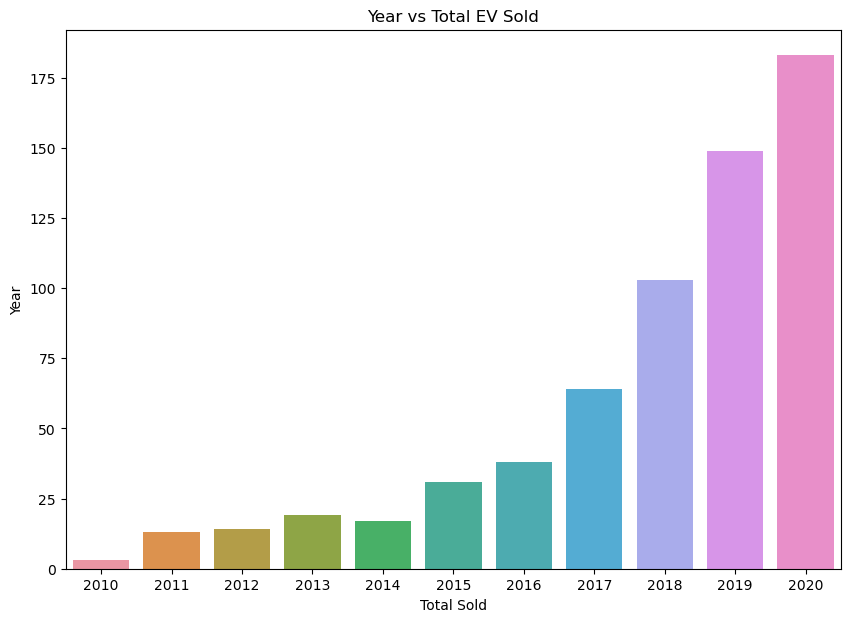

In [109]:
fig=plt.figure(figsize = (10, 7))
sns.barplot(x="Year", y="Total_Sold", data=df)
plt.title('Year vs Total EV Sold')
plt.xlabel('Total Sold')
plt.ylabel('Year')
plt.show()

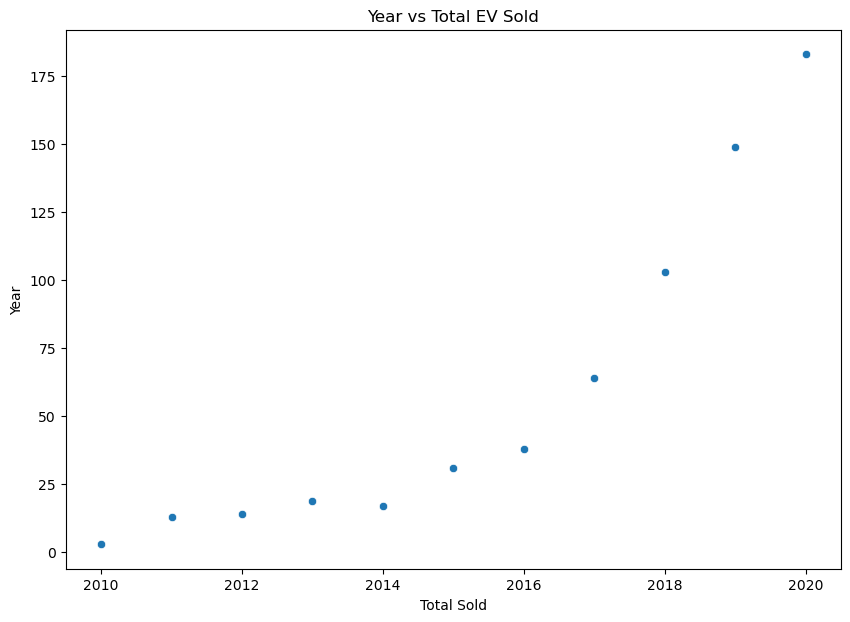

In [110]:
fig=plt.figure(figsize = (10, 7))
sns.scatterplot(x="Year", y="Total_Sold", data=df)
plt.title('Year vs Total EV Sold')
plt.xlabel('Total Sold')
plt.ylabel('Year')
plt.show()

In [111]:
X=np.array(df["Year"].values)
y=np.array(df["Total_Sold"].values)

X=X.reshape(-1,1)
y=y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)
  
print (xtrain[0:10, :])

[[ 1.5430335]
 [ 0.3086067]
 [-1.2344268]
 [ 0.6172134]
 [ 0.9258201]
 [-0.6172134]
 [-1.5430335]
 [ 0.       ]]


In [112]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train, y_train)
from sklearn import datasets, linear_model, metrics
classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [113]:
classifier.predict(X_train)

array([[133.23809524],
       [ 72.04761905],
       [ -4.44047619],
       [ 87.3452381 ],
       [102.64285714],
       [ 26.1547619 ],
       [-19.73809524],
       [ 56.75      ]])

Text(0, 0.5, 'Year')

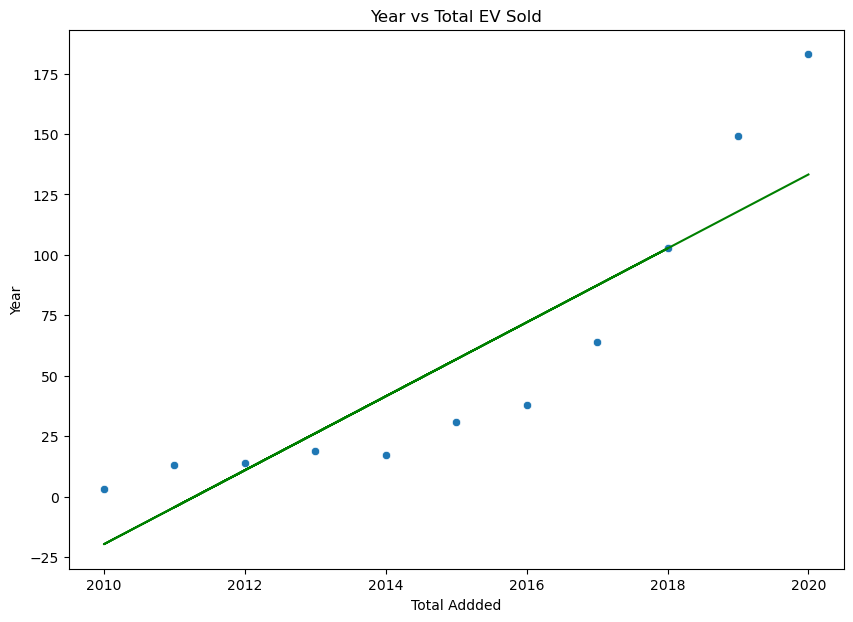

In [114]:
x=X_train
y=y_train
n = np.size(x)

x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean

y_pred = classifier.predict(X_train)
    
fig=plt.figure(figsize = (10, 7))
plt.title('Year vs Total EV Sold')
sns.scatterplot(x="Year", y="Total_Sold", data=df)
plt.plot(x, y_pred, color = 'green')
plt.xlabel('Total Addded')
plt.ylabel('Year')

In [115]:
print('Variance score: {}'.format(classifier.score(X_test, y_test)))

Variance score: 0.867702296438231


In [116]:
x=X_train
y=y_train
n = np.size(x)

# Fit the data(train the model)
classifier.fit(x, y)
  
# Predict
y_predicted = classifier.predict(x)
  
# model evaluation
mse=mean_squared_error(y,y_predicted)
  
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
  
# printing values
print('Slope:' ,classifier.coef_)
print('Intercept:', classifier.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[15.29761905]]
Intercept: [-30767.95238095]
MSE: 714.5074404761754
Root mean squared error:  26.730271986573115
R2 score:  0.7747232536382682


Text(0, 0.5, 'Year')

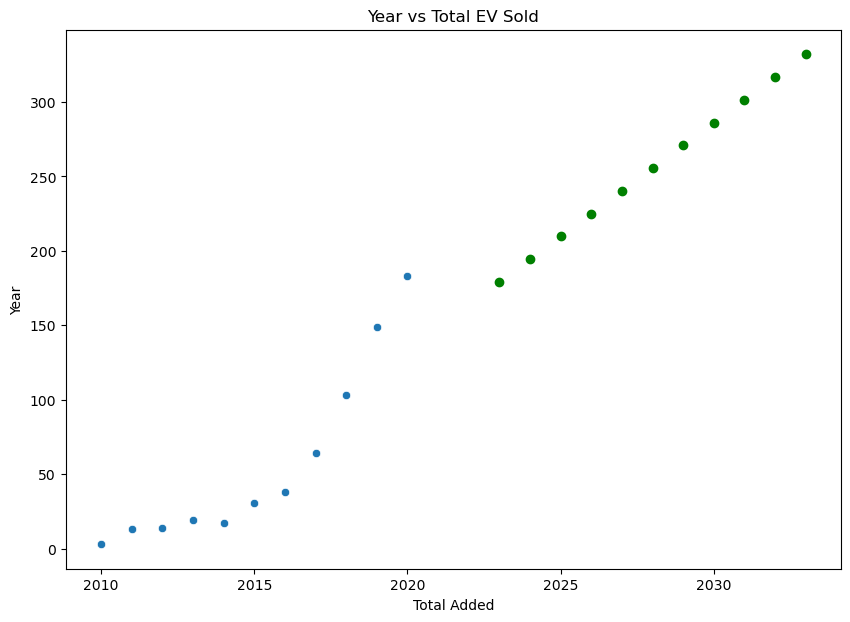

In [118]:
# You haven't provided the values of X_train and y_train, so I'm going to
# use the years list as the x values and an array of zeros as the y values
# for this example.

x = [2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033]
y = np.zeros(len(x))

# You also haven't provided the classifier object, so I'm going to use a
# dummy object for this example.

# Now we can use the x and y values to plot the data

# Reshape the x array to be a 2D array of size (n, 1) where n is the
# number of elements in the array
x = np.array(x).reshape(-1, 1)

# Use the classifier object to predict the y values for the x values
y_pred = classifier.predict(x)

# Create a figure object with a specified size
fig = plt.figure(figsize=(10, 7))

# Add a title to the plot
plt.title('Year vs Total EV Sold')

# Plot the x and y values as a scatterplot
sns.scatterplot(x="Year", y="Total_Sold", data=df)

# Plot the predicted y values against the x values as a scatter plot
plt.scatter(x, y_pred, color='green')

# Label the x and y axes
plt.xlabel('Total Added')
plt.ylabel('Year')
